In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

In [2]:
n = 10

In [3]:
random.seed(1)

In [4]:
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10000

x = []
y = []
eval = []
evalr = []
sigma = []

In [5]:
for npad in range(1,n+1):
    
    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            #print(i,npad,eval[npad-i-1])
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        evalr.append(eval[npad-1]/npad)
    print("Theory: ",npad,eval[npad-1])
    
    x.append(npad)
    end = npad
    for j in range(n_trys):
        while start < npad:
            jump = int(random.uniform(1,(end-start+1)))
            #print ("Jump = ",jump)
            start = start + jump
            #print ("Now at ",start)
            jumpsum = jumpsum + 1
        start = 0
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value/npad)
    sigma.append(expectation_value/npad*1/math.sqrt(n_trys))
    total_jumps = 0
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Theory:  1 1
Expectation value for n = 1 is 1.000000
Theory:  2 1.5
Expectation value for n = 2 is 1.500900
Theory:  3 1.8333333333333333
Expectation value for n = 3 is 1.836400
Theory:  4 2.083333333333333
Expectation value for n = 4 is 2.077400
Theory:  5 2.2833333333333337
Expectation value for n = 5 is 2.286100
Theory:  6 2.4499999999999997
Expectation value for n = 6 is 2.457800
Theory:  7 2.5928571428571425
Expectation value for n = 7 is 2.580900
Theory:  8 2.7178571428571425
Expectation value for n = 8 is 2.719300
Theory:  9 2.8289682539682537
Expectation value for n = 9 is 2.827100
Theory:  10 2.928968253968254
Expectation value for n = 10 is 2.937900


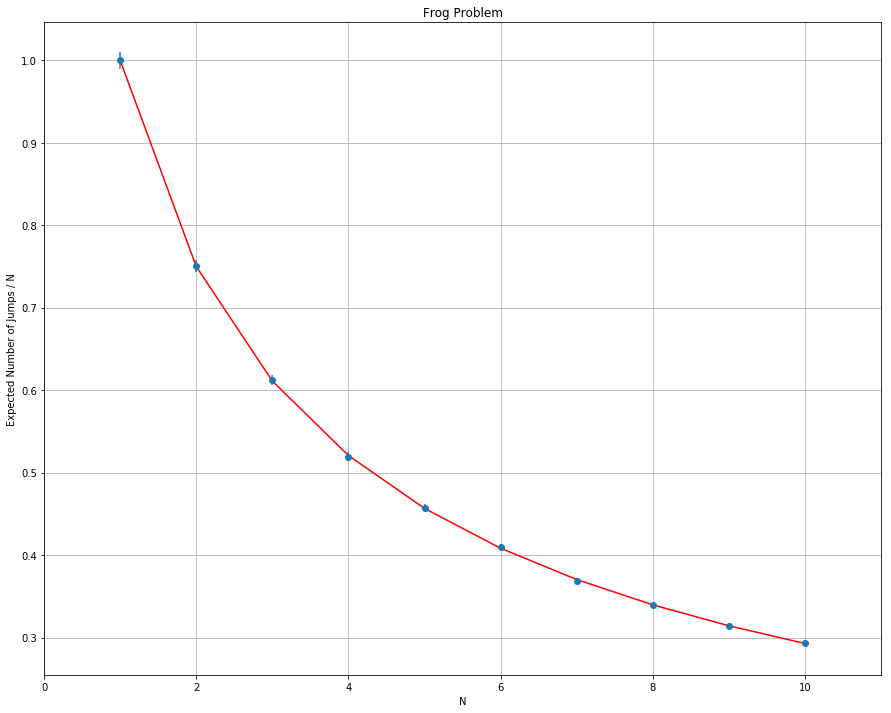

In [6]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
ax1.set_yscale("linear",nonposy='clip')
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r-')

m_params = 4

init_vals = [0.0 for x in range(0,m_params)]
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals,sigma=sigma,absolute_sigma=True)